In [1]:
from graphviz import Digraph

# CMSIS RTOS


There is a RTX real-time operating system from Keil http://www.keil.com/rl-arm/kernel.asp that has been wrapped in C++ and referred to as mbed RTOS. An API created with the idea to unify the way prohramming for any RTOS is the idea behind CMSIS-RTOS and it the front-end for mbed RTOS. 

## Tasks in CMSIS RTOS


A task is a fundamental object of any RTOS. A task represents functionality to be executed as code by the CPU. In CMSIS RTOS, a task is referred to as a *thread*. Think of a task or thread as functionality encapsulated as a finite state machine (FSM) and so the functionality can be in a number of states of execution. 

### States of threads in CMSIS

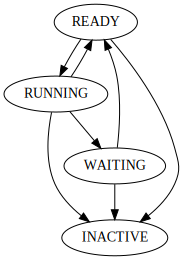

In [8]:
dot = Digraph(comment='States of threads', format='svg')

dot.node('Y', 'READY')
dot.node('W', 'WAITING')
dot.node('R', 'RUNNING')
dot.node('I', 'INACTIVE')

dot.edges(['YR', 'RY', 'RW', 'WY', 'WI', 'RI', 'YI'])

dot

### The *main()* function

It is a special thread that starts at system initialization with priority `osPriorityNormal`. It is the first thread scheduled by the RTOS

## Example

In [4]:
#include "mbed.h"
#include "cmsis_os.h"            // The RTOS only include 

#define N 10

DigitalOut led1(LED1); // LED1 output
DigitalOut led4(LED4); // LED4 output

// function prototypes
void led1_thread (void const *args);
void led4_thread (void const *args);

// declaration
osThreadId led_ID1, led_ID4;  // Two thread handles

// definition of two threads
osThreadDef(led1_thread, osPriorityNormal, DEFAULT_STACK_SIZE); 
osThreadDef(led4_thread, osPriorityNormal, DEFAULT_STACK_SIZE); 

int main() {
// spawnning the thread
led_ID1 = osThreadCreate(osThread(led1_thread), (void *) N);

}


In [ ]:
// function to be attached to thread dealing with LED1
void led1_thread(void const *args) {
    for (int i = 0; i < (uint32_t)args; i++) {
        led1 = !led1;
        osDelay(2000);
    }
    osStatus status;
    led_ID4 = osThreadCreate(osThread(led4_thread), NULL);
    osDelay(10000);

    status = osThreadTerminate(led_ID4);
    if (status == osOK) {
      led4 = 0;
      while (true) {
        led1 = !led1;
        osDelay(500);

      }
    }
    else
       osThreadTerminate(led_ID1);
}

// function to be attached to thread dealing with LED4
void led4_thread(void const *args) {
    while (true) {
        led4 = !led4;
        osDelay(1000);
    }
}


### Creating a thread

In [ ]:
1. this is kind of a declaration 
osThreadID name;  # name becomes a thread handle

2. defintition of the thread
osThreadDef (name, priority, stack_size); # the parameters are: 

name: name of the function that will be bound to the thread
priority: initial priority given to the thread
instances: number of thread instances
stack_size: size in bytes for the thread stack. Zero specifies a default size
    
3. osThreadCreate(thread_def, void* argument); # the thread is set to READY state
the thread receives the argument pointer when the function is started

In [22]:
%%HTML
<video width="640" height="480" controls="controls">
  <source src="twothreads.mp4" type="video/mp4"/>
</video>